<a href="https://colab.research.google.com/github/onyekaokonji/Flower-Classification/blob/main/Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Imports

In [ ]:
import os
import shutil
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

###### Extracting images

In [ ]:
!tar -xvf /content/17flowers.tgz

jpg/files.txt
jpg/files.txt~
jpg/image_0001.jpg
jpg/image_0002.jpg
jpg/image_0003.jpg
jpg/image_0004.jpg
jpg/image_0005.jpg
jpg/image_0006.jpg
jpg/image_0007.jpg
jpg/image_0008.jpg
jpg/image_0009.jpg
jpg/image_0010.jpg
jpg/image_0011.jpg
jpg/image_0012.jpg
jpg/image_0013.jpg
jpg/image_0014.jpg
jpg/image_0015.jpg
jpg/image_0016.jpg
jpg/image_0017.jpg
jpg/image_0018.jpg
jpg/image_0019.jpg
jpg/image_0020.jpg
jpg/image_0021.jpg
jpg/image_0022.jpg
jpg/image_0023.jpg
jpg/image_0024.jpg
jpg/image_0025.jpg
jpg/image_0026.jpg
jpg/image_0027.jpg
jpg/image_0028.jpg
jpg/image_0029.jpg
jpg/image_0030.jpg
jpg/image_0031.jpg
jpg/image_0032.jpg
jpg/image_0033.jpg
jpg/image_0034.jpg
jpg/image_0035.jpg
jpg/image_0036.jpg
jpg/image_0037.jpg
jpg/image_0038.jpg
jpg/image_0039.jpg
jpg/image_0040.jpg
jpg/image_0041.jpg
jpg/image_0042.jpg
jpg/image_0043.jpg
jpg/image_0044.jpg
jpg/image_0045.jpg
jpg/image_0046.jpg
jpg/image_0047.jpg
jpg/image_0048.jpg
jpg/image_0049.jpg
jpg/image_0050.jpg
jpg/image_0051.jpg
jp

###### Grouping images into class labels at 80 per class

In [ ]:
# Extracting flower class labels

classes = 0 # class labels
total = 1361 # total number of images, the added 1 is to account for the indexing in the range method used below
for i  in range(1, total):
  img_path = f"/content/jpg/image_{str(i).zfill(4)}.jpg" #creating new names of images per class label(number)
  destination_path = '/content/flowers/' + str(classes).zfill(2) 

  if not os.path.exists(destination_path):
    os.makedirs(destination_path) # creating destination path for images per class
  shutil.copy(img_path, destination_path)

  # for every set of 80 images, update class number
  if i % 80 == 0:
    classes += 1

###### Creating training and validation datasets

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                   vertical_flip = True,
                                   rescale = 1/255.,
                                   validation_split = 0.1)

train_data_generator = train_datagen.flow_from_directory(directory = '/content/flowers',
                                                         target_size = (256, 256),
                                                         batch_size = 32,
                                                         class_mode = 'categorical',
                                                         subset = 'training')

validation_datagen = ImageDataGenerator(rescale = 1/255., validation_split = 0.1)

validation_data_generator = validation_datagen.flow_from_directory(directory = '/content/flowers',
                                                                   target_size = (256, 256),
                                                                   batch_size = 32,
                                                                   class_mode = 'categorical',
                                                                   subset = 'validation')

Found 1224 images belonging to 17 classes.
Found 136 images belonging to 17 classes.


###### Model building, compiling and training

In [ ]:
vgg = VGG19(include_top = False, weights = 'imagenet', input_shape = (256, 256, 3), classes = 17)
vgg.trainable = False

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
x = Flatten()(vgg.output)
dense1 = Dense(units=128,activation='relu')(x)
output = Dense(units=17, activation='softmax')(dense1)
vgg_model = Model(inputs = vgg.input, outputs = output)

In [ ]:
vgg_adam = Adam(learning_rate = 0.0001)

vgg_model_precision = Precision()
vgg_model_recall = Recall()

vgg_model.compile(optimizer = vgg_adam, loss = 'categorical_crossentropy', metrics = ['Accuracy', vgg_model_precision, vgg_model_recall])

vgg_model.fit(x = train_data_generator, batch_size = 32, epochs = 20, validation_data = validation_data_generator)

Epoch 1/20
39/39 [==============================] - 35s 517ms/step - loss: 2.2127 - Accuracy: 0.3611 - precision: 0.9683 - recall: 0.0498 - val_loss: 1.4169 - val_Accuracy: 0.6471 - val_precision: 0.9474 - val_recall: 0.2647
Epoch 2/20
39/39 [==============================] - 18s 459ms/step - loss: 1.2687 - Accuracy: 0.6846 - precision: 0.9707 - recall: 0.3252 - val_loss: 1.0388 - val_Accuracy: 0.7426 - val_precision: 0.9437 - val_recall: 0.4926
Epoch 3/20
39/39 [==============================] - 18s 461ms/step - loss: 0.9207 - Accuracy: 0.7704 - precision: 0.9750 - recall: 0.5106 - val_loss: 0.8251 - val_Accuracy: 0.7647 - val_precision: 0.9512 - val_recall: 0.5735
Epoch 4/20
39/39 [==============================] - 18s 470ms/step - loss: 0.7416 - Accuracy: 0.8162 - precision: 0.9685 - recall: 0.6038 - val_loss: 0.6903 - val_Accuracy: 0.8162 - val_precision: 0.9314 - val_recall: 0.6985
Epoch 5/20
39/39 [==============================] - 18s 468ms/step - loss: 0.5986 - Accuracy: 0.8717

###### Saving trained model

In [ ]:
vgg_model.save('flower_classification_model.h5')

###### Testing model performance on unseen test set

In [ ]:
# load sample test image
def load_test_image(ti):
  test_image = cv2.imread(ti)
  test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
  
  plt.figure(figsize = (10, 8))
  plt.imshow(test_image)
  
  test_image = cv2.resize(test_image, (256, 256))
  test_image = test_image/255.
  test_image = np.expand_dims(test_image, axis = 0)

  return test_image

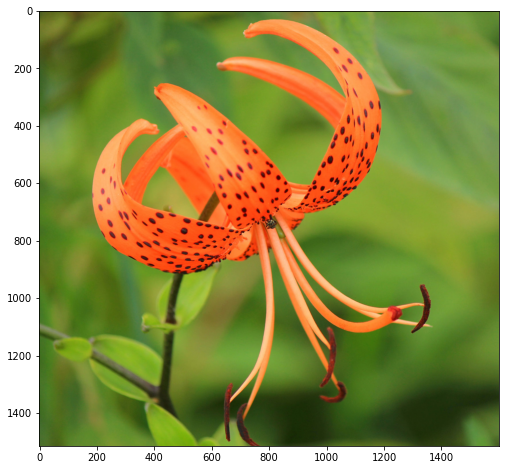

In [ ]:
test_image_1 = load_test_image('/content/tigerlilly.jpeg')

In [ ]:
def predict(img):
  start_time = time.time()
  pred = vgg_model.predict(img)
  end_time = time.time()
  
  print('Inference time is {}'.format(end_time-start_time))

  pred_indices = np.argmax(pred, axis = 1)
  for i in pred_indices:
    if pred_indices == 0:
      prediction = 'daffodil'
    elif pred_indices == 1:
      prediction = 'snowdrop'
    elif pred_indices == 2:
      prediction = 'lillyvalley'
    elif pred_indices == 3:
      prediction = 'bluebell'
    elif pred_indices == 4:
      prediction = 'crocus'
    elif pred_indices == 5:
      prediction = 'tulip'
    elif pred_indices == 6:
      prediction = 'tigerlilly'
    elif pred_indices == 7:
      prediction = 'frittilary'
    elif pred_indices == 8:
      prediction = 'sunflower'
    elif pred_indices == 9:
      prediction = 'daisy'
    elif pred_indices == 10:
      prediction = "colt's foot"
    elif pred_indices == 11:
      prediction = 'cowslip'
    elif pred_indices == 12:
      prediction = 'buttercup'
    elif pred_indices == 13:
      prediction = 'windflower'
    elif pred_indices == 14:
      prediction = 'dandeloin'
    elif pred_indices == 15:
      prediction = 'iris'
    else:
      prediction = 'pansy'

    print('Prediction is: ')

  return prediction

In [ ]:
print(predict(test_image_1))

Inference time is 0.1253817081451416
Prediction is: 
tigerlilly
